In [24]:
# Used to create DataFrames - organise and explore data in rows and columns
import pandas as pd

# Used to handle numerical computing e.g. arrays, perform mathematical calculations and statistical functions
import numpy as np

# Used for basic visualisation  plots, bar graphs, and histograms
import matplotlib.pyplot as plt

# Built on matplotlib for statistcal ddata visualisation. Makes better looking grpahs with lwss code
import seaborn as sns

# Splits dataset into training and testing set. Ensures model is tested unseen data.
# Tool used for hyperparameter tuning. Randomly tries combinitations of models parameters using cross-validaton to find the best configuration
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Import basic Linear Regression model which assumes straight linear reationship between input features (x) and target values (Y)
from sklearn.linear_model import LinearRegression

# Imports a Random Forest Regressor model which creates an ensemble of decision tress and avergaes their resuls for better accuracy - more resistant to overfitting
from sklearn.ensemble import RandomForestRegressor

# Import Extreme Gradient Boost model whhich builds trees on at a time eah correcting the mistakes of the last
# Uses gradient descent and regularisation techniques to prevent overfitting and improve activity
from xgboost import XGBRegressor

# Testing efficacy of the model
# MSE - penalises larger errors more that smaller ones
# MAE - measure avaergae size of error
# R2 Sore - tells how well the model explains the variance in data. 1 = perfect, 0 = terrible
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Standardises features by removing the mean ans scaling to unit variance (z - score normalisation) - features in same scale
from sklearn.preprocessing import StandardScaler

# Import for running statistical models like OLS regression.
# Provides detailed statisctial summaries, including pvalues, confidence intervals, r squared, assumptions checking
import statsmodels.api as sm

In [25]:
# Mount Google drive to access dataset file
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/Colab Notebooks/Body Fat percentage dataset/bodyfat.csv"
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# Display basic information about the datatset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB
None


In [27]:
# Display first few rows of the dataset information
print(df.head())

   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  


In [28]:
# Check for missing data for each column. Fill any missing values with median of of each column
df.fillna(df.median(), inplace =True)
print(df.isnull().sum())

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64


## Dataset Metrics
1. Density determined from underwater weighing

2. Body fat percentage (Siri's 1956 equation)
3. Age (years)
4. Weight (lbs)
5. Height (inches)
6. Neck circumferemce (cm)
7. Chest circumference (cm)
8. Abdomen 2 circumference (cm)
9. Hip circumference (cm)
10. Thigh circumference (cm)
11. Knee circumference (cm)
12. Ankle circumference (cm)
13. Biceps (extended) circumference (cm)
14. Wrist circumference (cm)




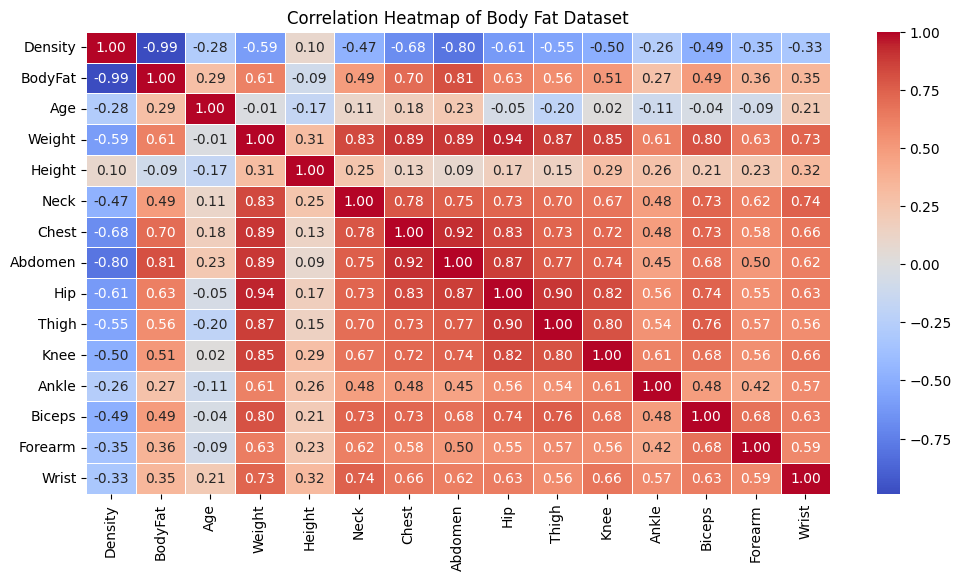

In [29]:
# Plot correlation matrix to show which features are stronly related
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Body Fat Dataset")
plt.show()

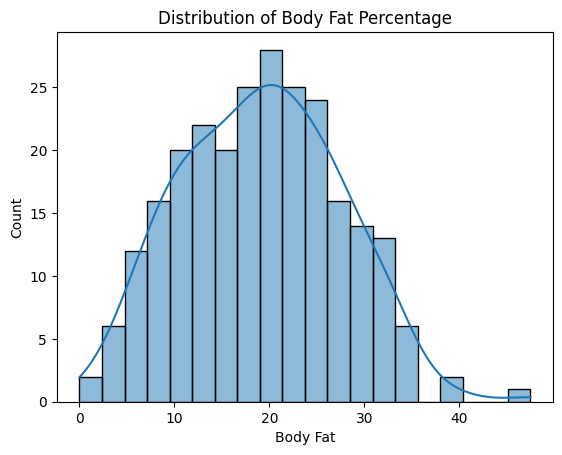

In [30]:
# Distribution plot for Body Fat
# KDE line gives a smooth estimate of the probability density, showing the overall shape of the distribution
sns.histplot(df["BodyFat"], bins=20, kde=True)
plt.title("Distribution of Body Fat Percentage")
plt.xlabel("Body Fat")
plt.ylabel("Count")
plt.show()

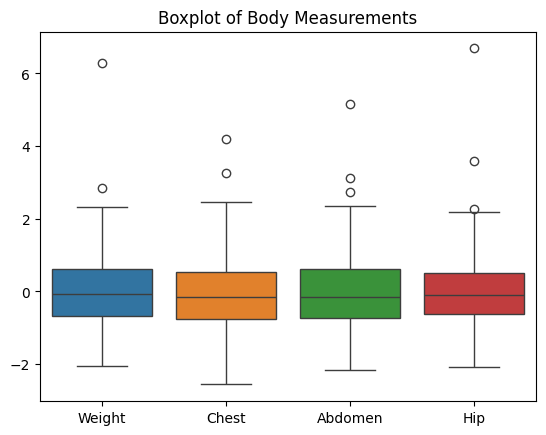

In [31]:
# Boxplot of selected body measurements
# Middle Interquartile range (50%) values
# Whiskers represents normal range to, up to 1.5 x IQR

scaled_columns = ["Weight", "Chest", "Abdomen", "Hip"]

# Creates scaler to standardise features
scaler = StandardScaler()

# Replaces orginal values with standardised ones
# Calculates the mean and standard deviation of the features and then standardises them
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

sns.boxplot(data=df[scaled_columns])
plt.title("Boxplot of Body Measurements")
plt.show()

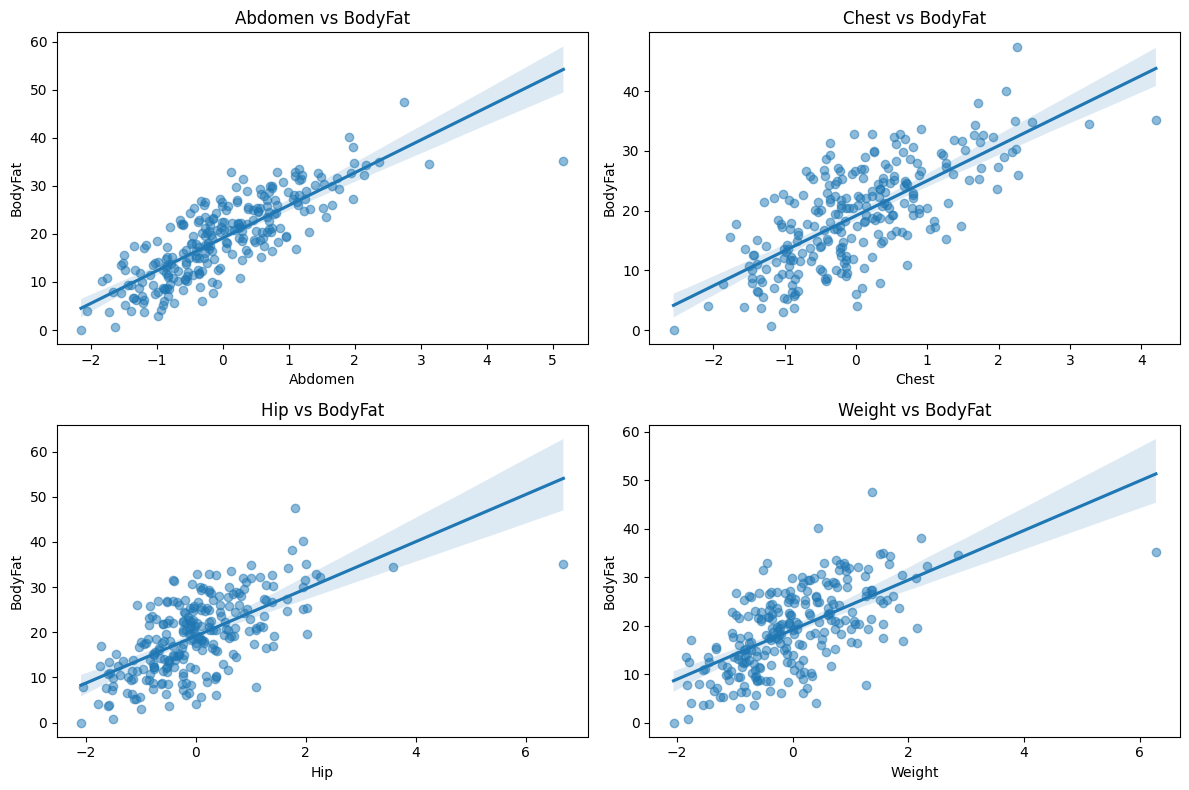

In [32]:
# Features I will be exploring against the target variable bodyfat percenatge
features = ["Abdomen", "Chest", "Hip", "Weight"]

# Figure to hold all subplots-one for each feature
plt.figure(figsize=(12, 8))

# For loop to go through each feature in list one by one
# 'Enumerate' gives both the index (for subplot position) and the feature name
for i, feature in enumerate(features, 1):

  # subplot layout with 2 rows and 2 columns, i indicates the position of the current plot (1 to 4)
    plt.subplot(2, 2, i)

    # Creates scatterplot with a regression line
    # Scatter_kws = styling for the dots (alpha=0.5 makes the points semi-transparent)
    sns.regplot(data=df, x=feature, y="BodyFat", scatter_kws={"alpha":0.5})

    plt.title(f"{feature} vs BodyFat")

plt.tight_layout()
plt.show()

In [33]:
#Feature Selection. Sets X to be all the features except BodyFat and Density
X = df.drop(columns=["BodyFat", "Density"])

# Sets y to be Body fat as output variable
y = df["BodyFat"]

In [34]:
#Standardise features for regression. Creates a scaler to standardise our values
scaler = StandardScaler()

# scales X and keeps the column names
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [35]:
# Backward stepwise selection function to automatically remove features one at a time that are not statistically useful
# If significance threshold greater than 5% - remove
def backward_stepwise_selection(X_data, y_data, alpha= 0.05):

  # List of all features
  remaining = list(X_data.columns)

  # Backward Regression until all features are removed
  # Loop keeps removing features that are not useful until no more need to be removed
  while len(remaining) > 0:

    # Constant column (for intercept)
    X_selected = sm.add_constant(X_data[remaining])

    # Fit an ordinary least squares regression model
    model = sm.OLS(y_data, X_selected).fit()

    # Get the p-values, skip the constant.
    # p-values show how statistically useful each feature is. Lower p value - more useful
    p_values = model.pvalues.iloc[1:]

    # Find the biggest p-value - remove
    max_p = p_values.max()

    # If it's too big, the feature is not useful
    if max_p >= alpha:

      # Find the feature with the biggest p-value
      remove_features = p_values.idxmax()

      # Remove that feature
      remaining.remove(remove_features)

    else:

      # Stop if all remaining features are useful
        break

        # Return the list of useful features
  return remaining

# Scales data and puts all features on same scale
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

# Run feature selection
selected_features = backward_stepwise_selection(X_scaled, y, alpha=0.05)

print("Selected Features:", selected_features)


Selected Features: ['Weight', 'Abdomen', 'Forearm', 'Wrist']


In [36]:
# Make a new version of X with only the selected features
final_features = df[selected_features]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_features, y, test_size=0.2, random_state=42)

# Scale the training features
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test features
X_test_scaled = scaler.transform(X_test)

In [37]:
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    sns.scatterplot(x= y_pred, y= residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residual plot - {model_name}')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.show()

In [38]:
# Creates linear Regression model
lr_model = LinearRegression()

# Train it on the training data
lr_model.fit(X_train_scaled, y_train)

# Predict body fat for the test set
y_pred_lr = lr_model.predict(X_test_scaled)

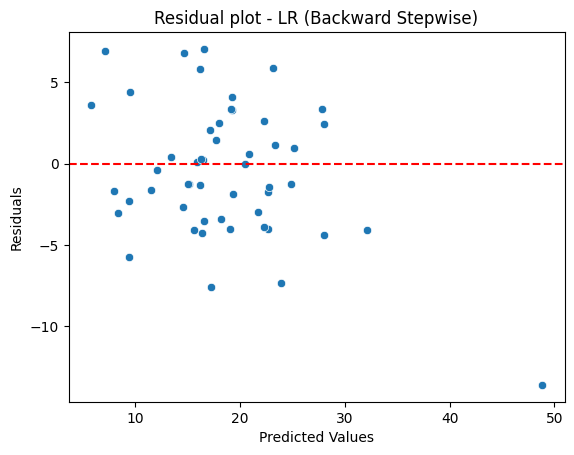

In [39]:
plot_residuals(y_test, y_pred_lr, "LR (Backward Stepwise)")

In [40]:
# Function to print out how well a model did
#def evaluate_lr_model_metrics(true_vals, predictions, model_name):
#  mse = mean_squared_error(true_vals, predictions)
#  mae = mean_absolute_error(true_vals, predictions)
#  r2 = r2_score(true_vals, predictions)

# MSE - penalises larger errors more that smaller ones
# MAE - measure avaergae size of error
# R2 Sore - tells how well the model explains the variance in data. 1 = perfect, 0 = terrible
#  print("\n---", model_name, "Evaluation ---")
#  print("MSE:", round(mse, 2))
#  print("MAE:", round(mae, 2))
#  print("R^2 Score:", round(r2, 2))

#evaluate_lr_model_metrics(y_test, y_pred_lr, "LR (Backward Stepwise)")

Feature scaling was applied only for the linear regression model, as it is sensitive to feature magnitudes. For Random Forest and XGBoost, scaling was intentionally omitted, as these tree-based models are not influenced by feature scales and splitting decisions are made based on thresholds rather than distances.

In [41]:
# Creates basic Random Forest model. random_state=42 ensures results are reproducible
rf_model = RandomForestRegressor(random_state=42)

# Randomised Search
rf_param = {
    # Number of trees in the forest
    'n_estimators': np.arange(50, 300, 50),
    # Max depth of each tree
    'max_depth': [None, 10, 20, 30],
    # Min number of samples needed to split a node
    'min_samples_split': [2, 5, 10],
    # Min number of samples at each leaf
    'min_samples_leaf': [1, 2, 4]
}

# Randomly trying different hyperparameter combinations. 20 combos
# hyperparameter options we defined
# minimise the error (lower MSE = better)
# 5-fold cross-validation for more reliable results
# all computer’s cores to make it faster
tune_rf = RandomizedSearchCV(rf_model, rf_param, n_iter=20, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)
tune_rf.fit(X_train, y_train)
rf_best = tune_rf.best_estimator_
y_pred_rf = rf_best.predict(X_test)


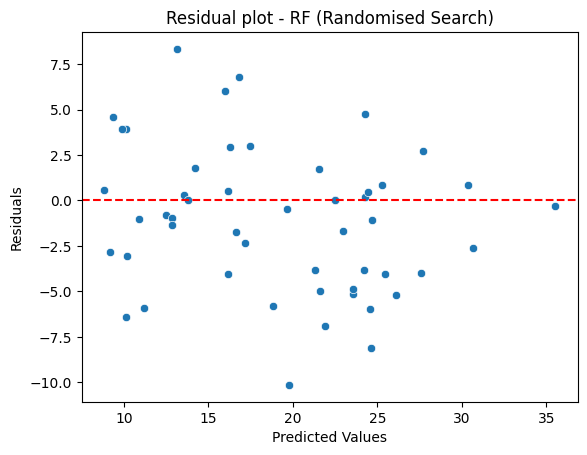

In [42]:
plot_residuals(y_test, y_pred_rf, "RF (Randomised Search)")

In [43]:
# XGBoost Regressor
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)

xgb_param = {
    # Number of trees in the forest - more trees more stable
    'n_estimators': np.arange(50, 300, 50),
    # how mcu  each tree is allowed to correct previous tree mistake
    # lower/slower to higher/faster learning
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10, 15],
    'subsample': [0.6, 0.8, 1.0]
}

tune_xgb = RandomizedSearchCV(xgb_model, xgb_param, n_iter=20, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)
tune_xgb.fit(X_train, y_train)
xgb_best = tune_xgb.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)


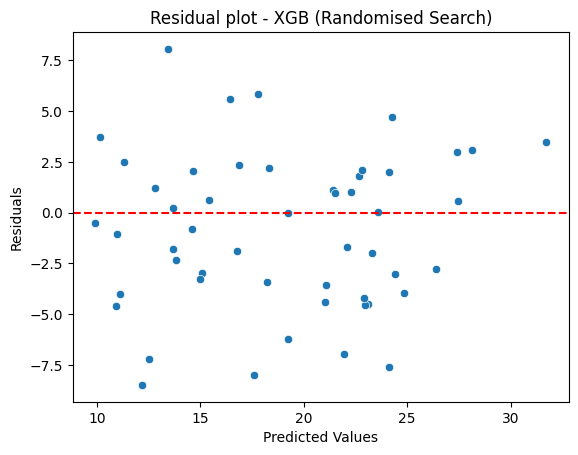

In [44]:
plot_residuals(y_test, y_pred_xgb, "XGB (Randomised Search)")


Evaluating Linear Regression:
Mean Squared Error (MSE): 16.62
Mean Absolute Error (MAE): 3.22
R-squared (R2): 0.64

Evaluating Random Forest:
Mean Squared Error (MSE): 16.55
Mean Absolute Error (MAE): 3.21
R-squared (R2): 0.64

Evaluating XGBoost:
Mean Squared Error (MSE): 15.29
Mean Absolute Error (MAE): 3.21
R-squared (R2): 0.67

Model Performance Comparison:
               Model       MSE  R² Score       MAE
0  Linear Regression  4.077324  0.642621  3.221669
1      Random Forest  4.068516  0.644164  3.213395
2            XGBoost  3.910776  0.671221  3.213891


<ipython-input-46-2767510d7515>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MSE", data=model_comparison, palette="viridis")


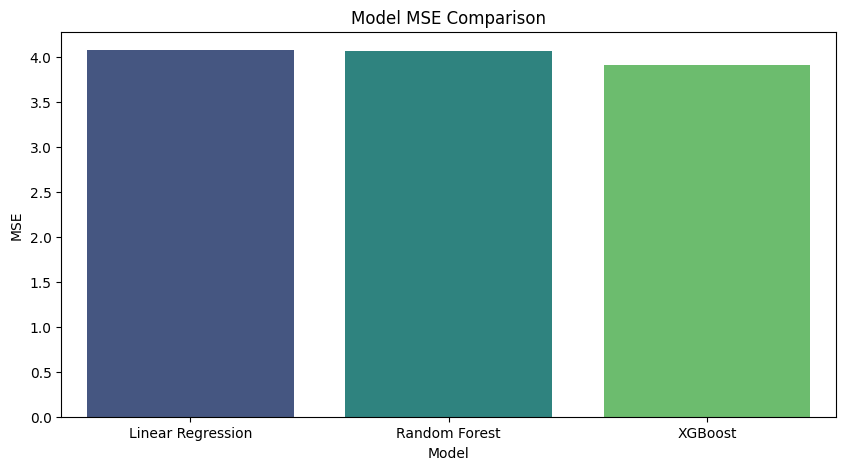

In [46]:
# Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nEvaluating {model_name}:")
    print("Mean Squared Error (MSE):", round(mse, 2))
    print("Mean Absolute Error (MAE):", round(mae, 2))
    print("R-squared (R2):", round(r2, 2))

# Evaluate XGBboost and Random Forest Models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

# Model Comparison Table
model_comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "MSE": [np.sqrt(mean_squared_error(y_test, y_pred_lr)),
             np.sqrt(mean_squared_error(y_test, y_pred_rf)),
             np.sqrt(mean_squared_error(y_test, y_pred_xgb))],
    "R² Score": [r2_score(y_test, y_pred_lr),
                 r2_score(y_test, y_pred_rf),
                 r2_score(y_test, y_pred_xgb)],
    "MAE": [mean_absolute_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_xgb)]
})

# Print model comparison table
print("\nModel Performance Comparison:")
print(model_comparison)

# Visualising model performance with bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="MSE", data=model_comparison, palette="viridis")
plt.title("Model MSE Comparison")
plt.show()


Note: Tested feature selection using three methods as I was getting a high VIF and was unable to use the features
1. Lowering correlation threshold to (0.40+) from 0.60+
2. Using Feature importance (Random Forest)
3. Manually Selecting Featires (Domain Knowledge)

Reason: when applying a correlation threshold only Bodyfat itself remained - no independen features had a strong enough correlation to be selected.

Creates 2 problems:
1. having no predictors (features) left for the model to learn from
2. Model will not be useful
